In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [ ]:
raw_path = os.path.join(
    os.path.dirname(os.path.dirname(os.getcwd())),
    'data',
    'raw',
    'track_features_50k.csv')

raw = pd.read_csv(raw_path, sep=',')
raw = raw.rename(columns={'music_genre': 'genre'})
raw = raw.dropna()

# High Level Analysis

## Data Info

In [ ]:
print(raw.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 50004
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       50000 non-null  float64
 1   artist_name       50000 non-null  object 
 2   track_name        50000 non-null  object 
 3   popularity        50000 non-null  float64
 4   acousticness      50000 non-null  float64
 5   danceability      50000 non-null  float64
 6   duration_ms       50000 non-null  float64
 7   energy            50000 non-null  float64
 8   instrumentalness  50000 non-null  float64
 9   key               50000 non-null  object 
 10  liveness          50000 non-null  float64
 11  loudness          50000 non-null  float64
 12  mode              50000 non-null  object 
 13  speechiness       50000 non-null  float64
 14  tempo             50000 non-null  object 
 15  obtained_date     50000 non-null  object 
 16  valence           50000 non-null  float6

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 50004
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       50000 non-null  float64
 1   artist_name       50000 non-null  object 
 2   track_name        50000 non-null  object 
 3   popularity        50000 non-null  float64
 4   acousticness      50000 non-null  float64
 5   danceability      50000 non-null  float64
 6   duration_ms       50000 non-null  float64
 7   energy            50000 non-null  float64
 8   instrumentalness  50000 non-null  float64
 9   key               50000 non-null  object 
 10  liveness          50000 non-null  float64
 11  loudness          50000 non-null  float64
 12  mode              50000 non-null  object 
 13  speechiness       50000 non-null  float64
 14  tempo             50000 non-null  object 
 15  obtained_date     50000 non-null  object 
 16  valence           50000 non-null  float6

In [ ]:
raw.describe().round(2)

,instance_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,valence
count,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00
mean,55888.40,44.22,0.31,0.56,221252.60,0.60,0.18,0.19,-9.13,0.09,0.46
std,20725.26,15.54,0.34,0.18,128671.96,0.26,0.33,0.16,6.16,0.10,0.25
min,20002.00,0.00,0.00,0.06,-1.00,0.00,0.00,0.01,-47.05,0.02,0.00
25%,37973.50,34.00,0.02,0.44,174800.00,0.43,0.00,0.10,-10.86,0.04,0.26
50%,55913.50,45.00,0.14,0.57,219281.00,0.64,0.00,0.13,-7.28,0.05,0.45
75%,73863.25,56.00,0.55,0.69,268612.25,0.82,0.16,0.24,-5.17,0.10,0.65
max,91759.00,99.00,1.00,0.99,4830606.00,1.00,1.00,1.00,3.74,0.94,0.99


,instance_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,valence
count,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00
mean,55888.40,44.22,0.31,0.56,221252.60,0.60,0.18,0.19,-9.13,0.09,0.46
std,20725.26,15.54,0.34,0.18,128671.96,0.26,0.33,0.16,6.16,0.10,0.25
min,20002.00,0.00,0.00,0.06,-1.00,0.00,0.00,0.01,-47.05,0.02,0.00
25%,37973.50,34.00,0.02,0.44,174800.00,0.43,0.00,0.10,-10.86,0.04,0.26
50%,55913.50,45.00,0.14,0.57,219281.00,0.64,0.00,0.13,-7.28,0.05,0.45
75%,73863.25,56.00,0.55,0.69,268612.25,0.82,0.16,0.24,-5.17,0.10,0.65
max,91759.00,99.00,1.00,0.99,4830606.00,1.00,1.00,1.00,3.74,0.94,0.99


In [ ]:
# Why is tempo an object type and not float?

test = raw[['tempo', 'instance_id']]
test.loc[~test['tempo'].str.match('\d+')]

,tempo,instance_id
5,?,89064.0
32,?,25836.0
35,?,27048.0
36,?,55617.0
39,?,69685.0
...,...,...
49918,?,63058.0
49964,?,53387.0
49967,?,76585.0
49976,?,79654.0


## Distributions

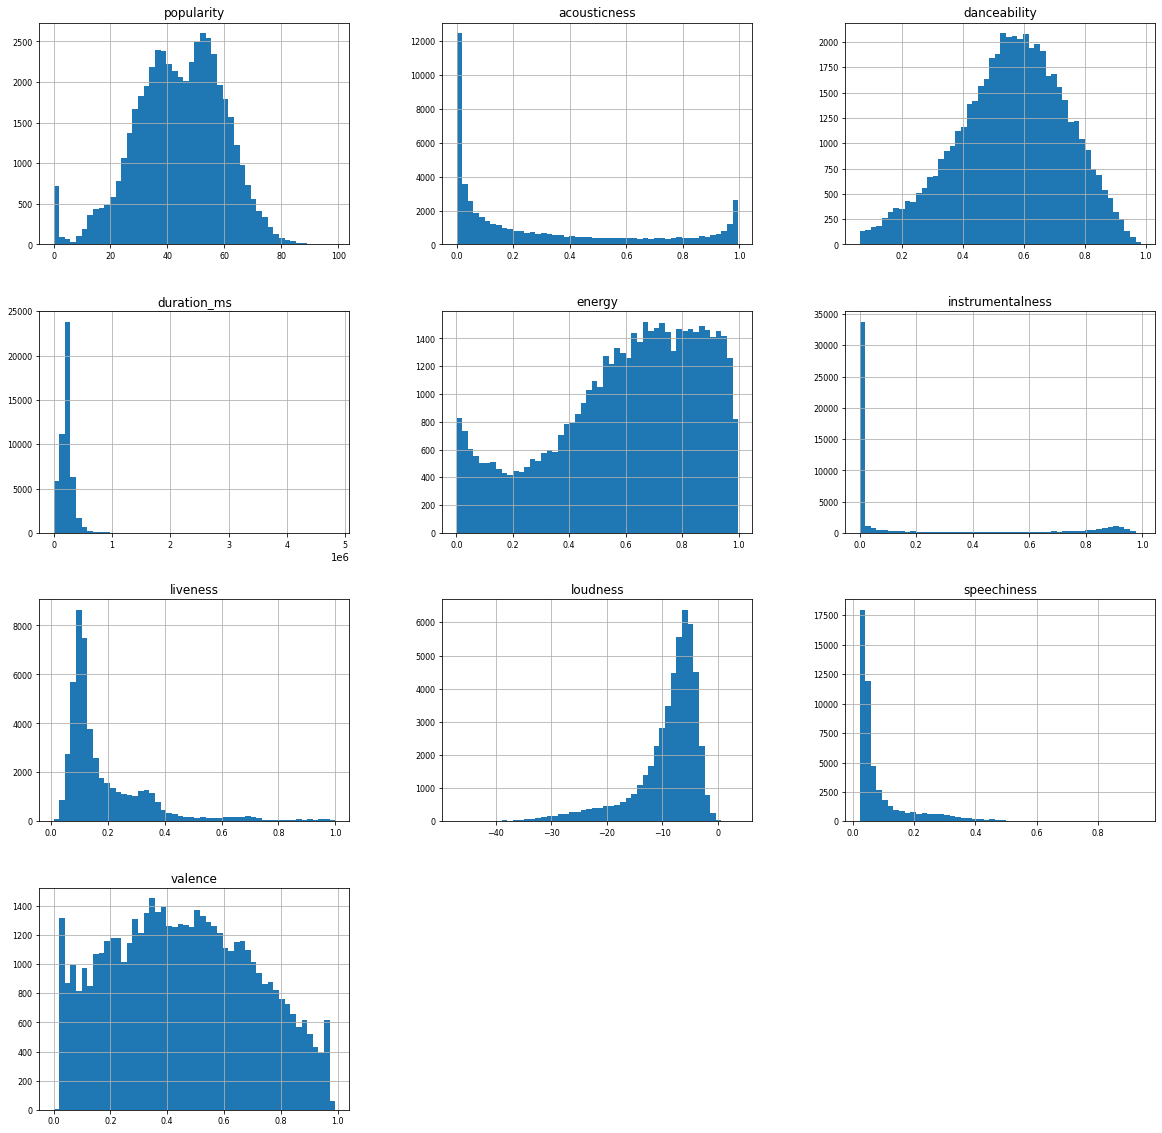

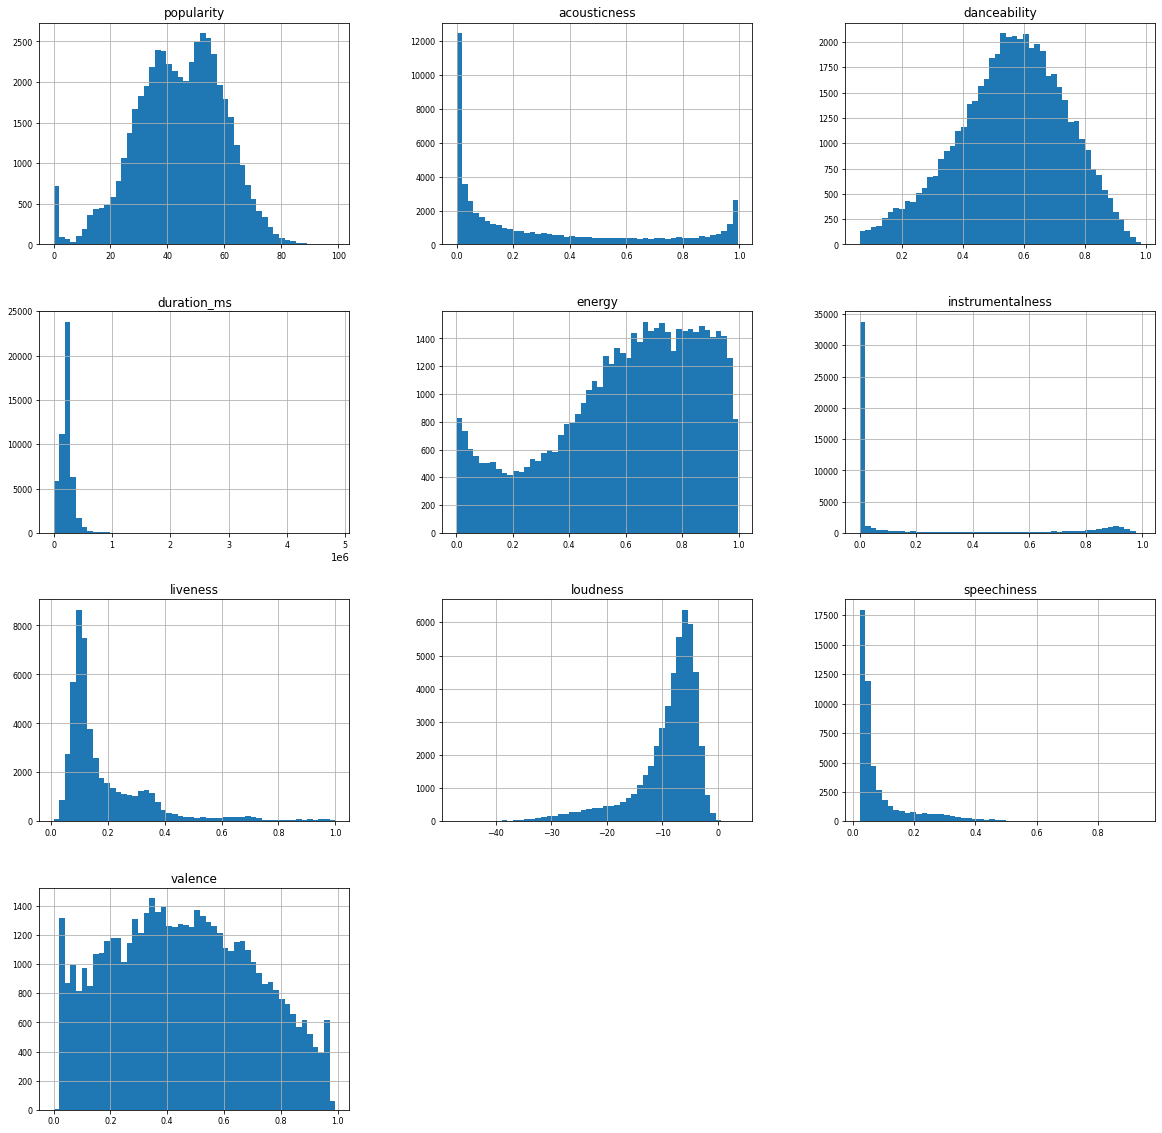

In [ ]:
hist_df = (
    raw
    .drop(columns=['instance_id'])
    .select_dtypes(include=['float64', 'int64'])
    .hist(figsize=(20, 20), bins=50, xlabelsize=8, ylabelsize=8)
)

> danceability and energy appear share a similar distribution

In [ ]:
def histogram(genre: str) -> None:
    plot = raw.loc[raw.genre==genre].select_dtypes(include=['float64', 'int64']).hist(
        figsize=(12,12), sharex=False, sharey=False, bins=50)
    plt.show()

raw.genre.unique()

array(['Electronic', 'Anime', 'Jazz', 'Alternative', 'Country', 'Rap',
       'Blues', 'Rock', 'Classical', 'Hip-Hop'], dtype=object)

array(['Electronic', 'Anime', 'Jazz', 'Alternative', 'Country', 'Rap',
       'Blues', 'Rock', 'Classical', 'Hip-Hop'], dtype=object)

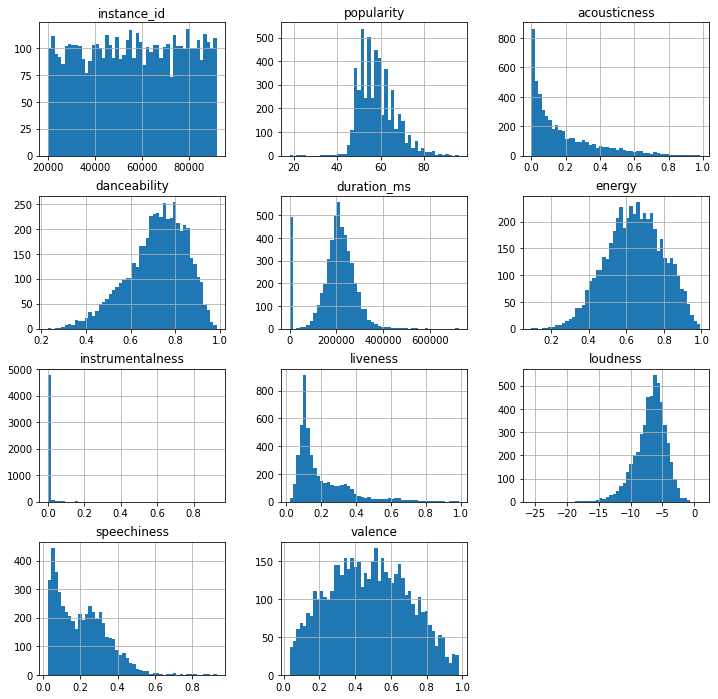

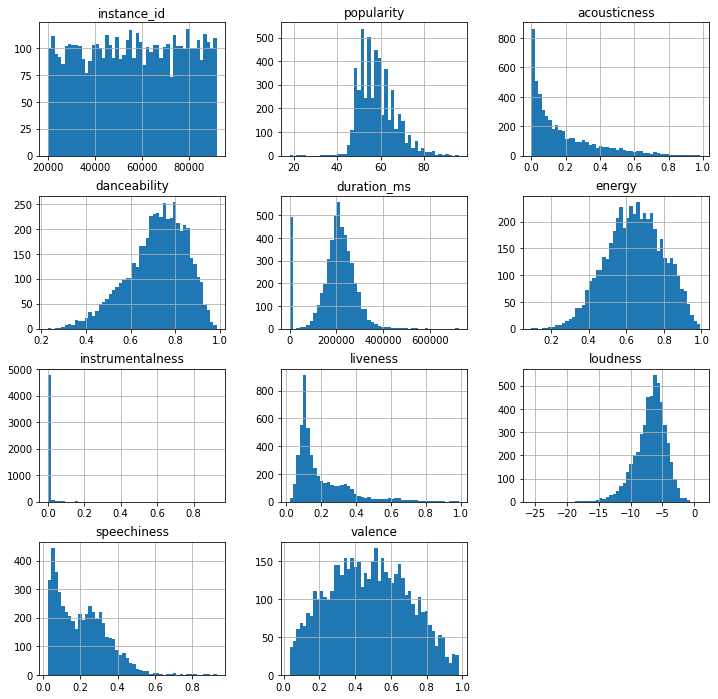

In [ ]:
histogram('Hip-Hop')

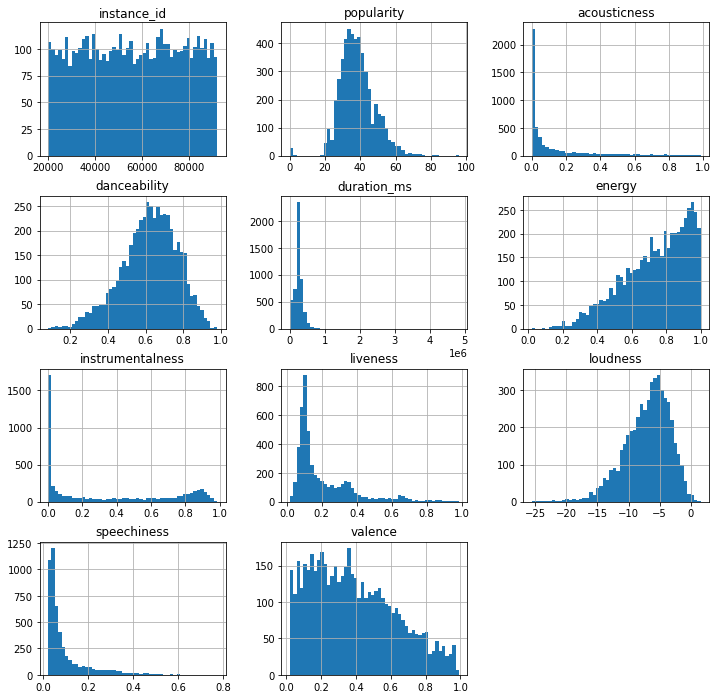

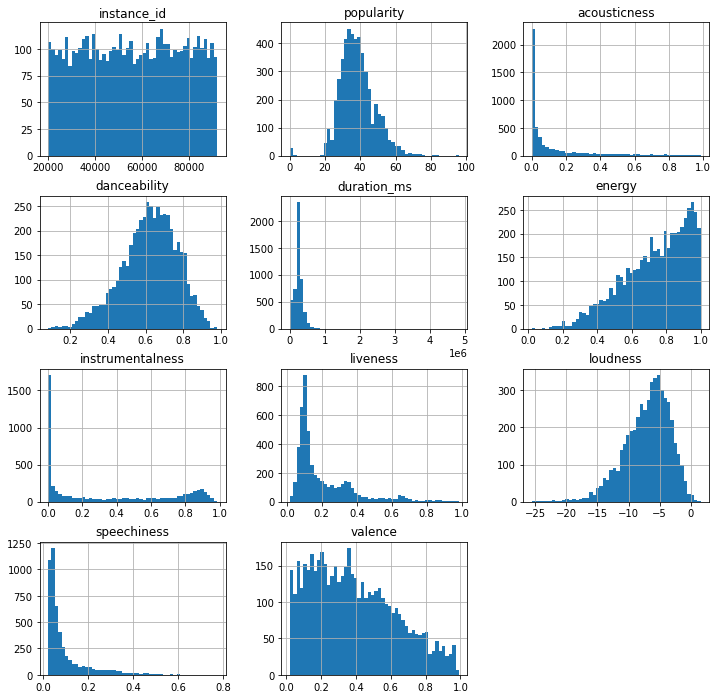

In [ ]:
histogram('Electronic')

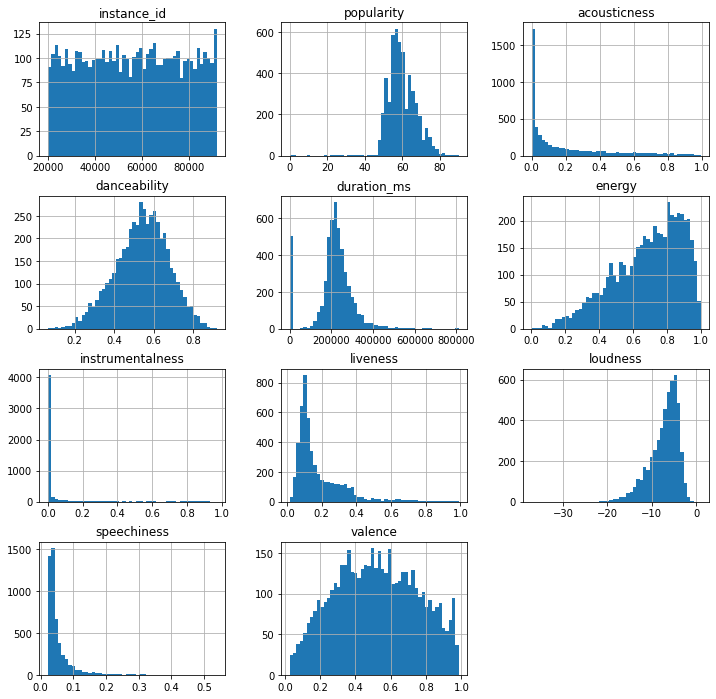

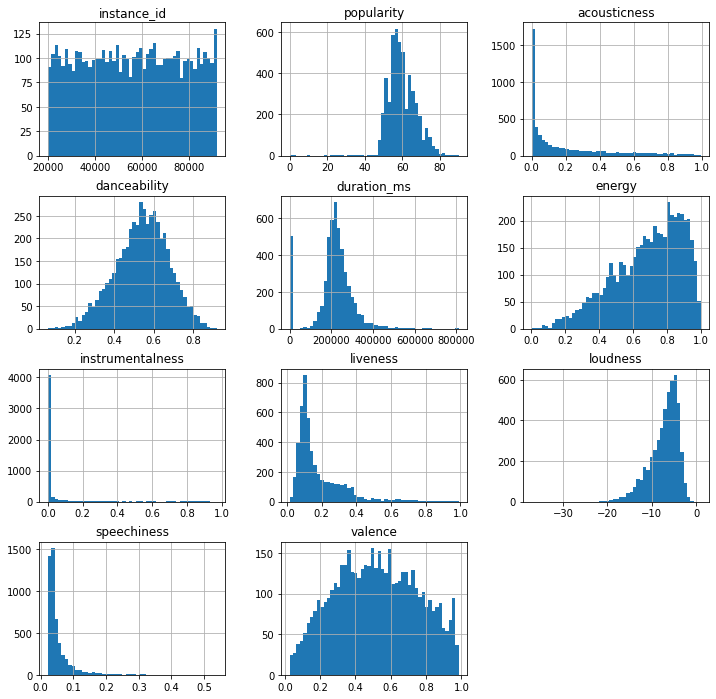

In [ ]:
histogram('Rock')

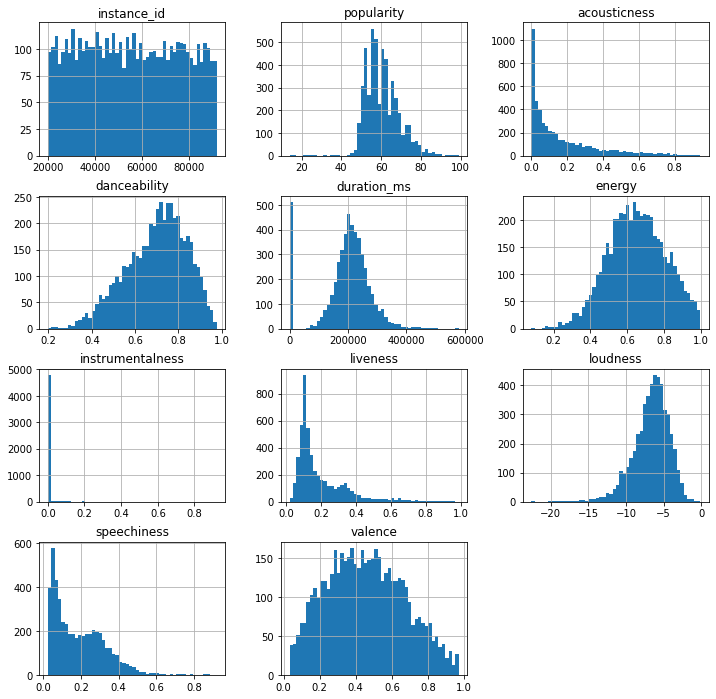

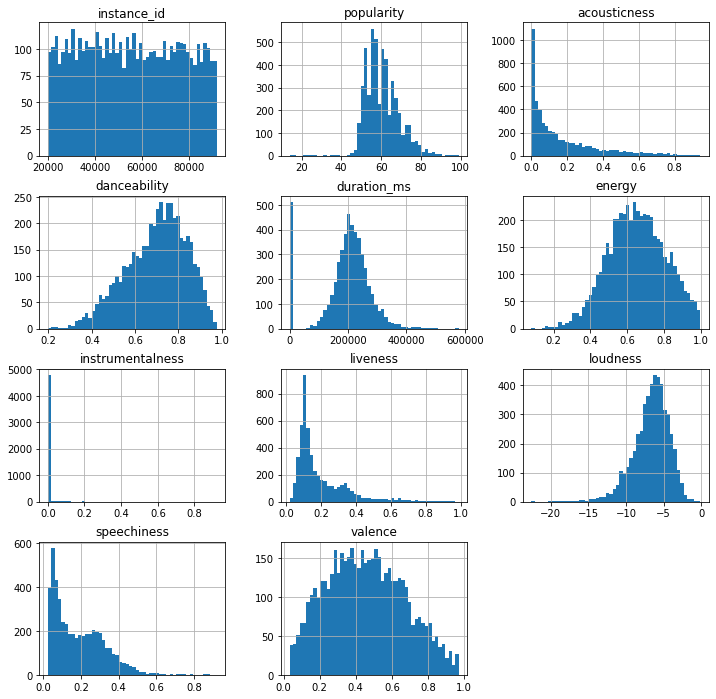

In [ ]:
histogram('Rap')

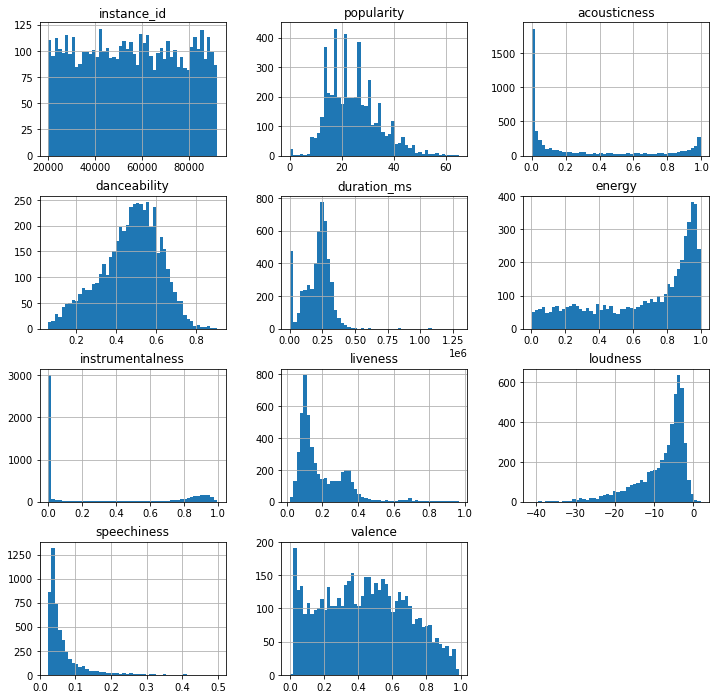

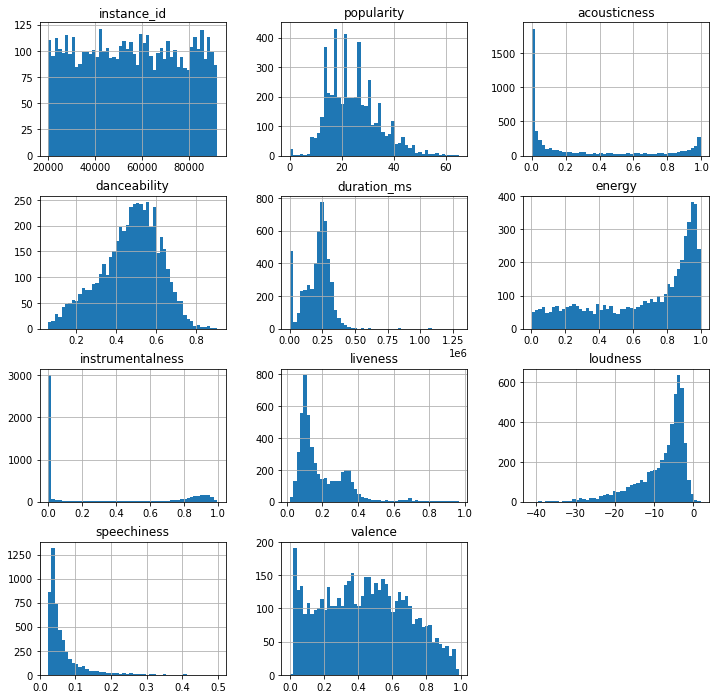

In [ ]:
histogram('Anime')